<a href="https://colab.research.google.com/github/julian-reed/InnotechMakeathon/blob/main/Team3MentalHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Team Innotech's Makeathon Project!

#Step 1: Data Cleaning

In [37]:
#importing necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [38]:
#load in the dataset
url = 'https://raw.githubusercontent.com/julian-reed/InnotechMakeathon/main/MentalHealthDataSet.csv'
df = pd.read_csv(url)

In [39]:
#Visualizing the dataset
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [41]:
#See how much data is missing
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
Age                            0  0.000000
seek_help                      0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
care_options                   0  0.000000
wellness_program               0  0.000000
Gender                         0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment                      0  0.000000
family_hist

In [42]:
#Removed due to a significant amount of missnig data
df = df.drop(['state'], axis= 1)
#Removed because when the survey was taken shouldn't correlate with 
#overall mental health
df = df.drop(['Timestamp'], axis= 1)
#Removed because we won't ask for additional comments in practice
df = df.drop(['comments'], axis= 1)
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [43]:
#Resolve NaN values using fillNa
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in df:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        df[feature] = df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
df.head(5)   

Error: Feature work_interfere not recognized.


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [44]:
#clean 'Gender'
#Make all elements lower case
gender = df['Gender'].str.lower()

#Select unique elements
gender = df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#remove other special instances
stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

print(df['Gender'].unique())

['female' 'male' 'trans']


In [45]:
#complete missing age with mean
df['Age'].fillna(df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(df['Age'])
s[s<18] = df['Age'].median()
df['Age'] = s
s = pd.Series(df['Age'])
s[s>120] = df['Age'].median()
df['Age'] = s

#Ranges of Age
df['age_range'] = pd.cut(df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [46]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
df['self_employed'] = df['self_employed'].replace([defaultString], 'No')
print(df['self_employed'].unique())

['No' 'Yes']


In [48]:
df['work_interfere'] = df['work_interfere'].replace([defaultString], 'Don\'t know' )
df['work_interfere'] = df['work_interfere'].replace('nan', 'Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' nan]


In [49]:
#Restict to only US survey responses due to low sample size in other countries
df_clean = df
df_clean = df_clean[df_clean.get("Country")=="United States"]
df_clean

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,female,United States,No,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
4,31,male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65
5,33,male,United States,No,Yes,No,Sometimes,6-25,No,Yes,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,31-65
6,35,female,United States,No,Yes,Yes,Sometimes,1-5,Yes,Yes,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,31-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,36,male,United States,No,Yes,No,Rarely,More than 1000,No,No,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,31-65
1255,32,male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,31-65
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,31-65
1257,46,female,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Yes,No,No,No,No,No,No,No,31-65


#Step 2: Brief Dataset Visualization

In [ ]:
df_clean

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,female,United States,No,No,Yes,6-25,No,Yes,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,male,United States,No,No,No,More than 1000,No,No,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
2,32,male,Canada,No,No,No,6-25,No,Yes,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-65
3,31,male,United Kingdom,No,Yes,Yes,26-100,No,Yes,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-65
4,31,male,United States,No,No,No,100-500,Yes,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,26-100,No,Yes,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,21-30
1255,32,male,United States,No,Yes,Yes,26-100,Yes,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,31-65
1256,34,male,United States,No,Yes,Yes,More than 1000,No,Yes,Yes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,31-65
1257,46,female,United States,No,No,No,100-500,Yes,Yes,No,...,Don't know,Yes,No,No,No,No,No,No,No,31-65


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


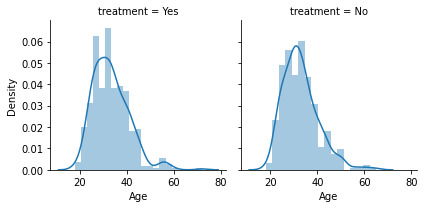

In [ ]:
g = sns.FacetGrid(df_clean, col='treatment')
g = g.map(sns.distplot, "Age")

<AxesSubplot:xlabel='treatment', ylabel='count'>

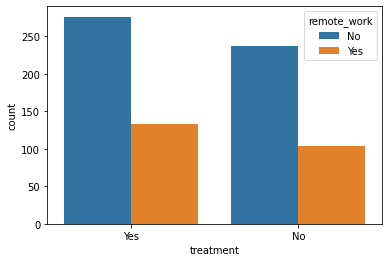

In [ ]:
sns.countplot(x='treatment',hue='remote_work',data=df_clean)

<AxesSubplot:xlabel='treatment', ylabel='count'>

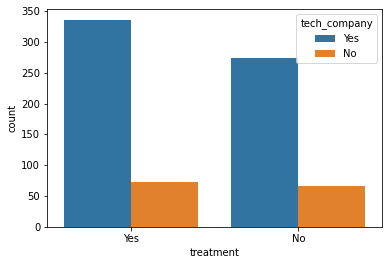

In [ ]:
sns.countplot(x='treatment',hue='tech_company',data=df_clean)

<AxesSubplot:xlabel='treatment', ylabel='count'>

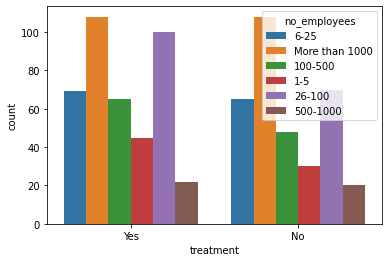

In [ ]:
sns.countplot(x='treatment',hue='no_employees',data=df_clean)

#Step 3: Encoding

In [50]:
#encoded version for cleaned dataset
labelDict = {}
df_encode = df_clean
for feature in df_encode:
    le = preprocessing.LabelEncoder()
    le.fit(df_encode[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df_encode[feature] = le.transform(df_encode[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

df_encode

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['United States']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['Never', 'Often', 'Rarely', 'Sometimes', nan]
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No

<ipython-input-50-b1ec280ef5c3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encode[feature] = le.transform(df_encode[feature])
<ipython-input-50-b1ec280ef5c3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encode[feature] = le.transform(df_encode[feature])
<ipython-input-50-b1ec280ef5c3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,0,1,1,4,0,1,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,0,2,5,0,0,...,0,0,1,0,0,1,1,0,0,2
4,13,1,0,0,0,0,0,1,1,1,...,0,1,1,1,2,2,2,0,0,2
5,15,1,0,0,1,0,3,4,0,1,...,0,1,1,2,2,1,0,0,0,2
6,17,0,0,0,1,1,3,0,1,1,...,1,0,0,1,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,18,1,0,0,1,0,2,5,0,0,...,2,0,0,1,1,1,1,0,0,2
1255,14,1,0,0,1,1,1,2,1,1,...,1,1,1,1,2,1,1,2,0,2
1256,16,1,0,0,1,1,3,5,0,1,...,1,2,2,0,0,1,1,1,0,2
1257,28,0,0,0,0,0,4,1,1,1,...,0,2,1,0,0,1,1,1,0,2


In [51]:
df_encode.columns
# classification report

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range'],
      dtype='object')

#Step 4: Model Training

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# all features except the treatment should be our x axis
X = df_encode[['Age', 'Gender', 'Country', 'self_employed', 'family_history', 'work_interfere',
        'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range']]

# treatment is our target feature hence it's on y-axis
y = df_encode['treatment'] 
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf =  RandomForestClassifier()
clf.fit(X_train, y_train)

y_prediction = clf.predict(X_test)

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        85
           1       0.84      0.88      0.86       103

    accuracy                           0.85       188
   macro avg       0.85      0.84      0.84       188
weighted avg       0.85      0.85      0.85       188



In [56]:
#ERIN - trying to increase numbers

# all features except the treatment should be our x axis
X = df_encode[['Age', 'Gender', 'Country', 'self_employed', 'family_history', 'work_interfere',
        'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range']]

# treatment is our target feature hence it's on y-axis
y = df_encode['treatment'] 


train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(train_features, train_labels)

predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')



X_train, X_test, y_train, y_test = train_test_split(X, y)
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_test = forest.predict(X_test)
print(classification_report(y_test, y_prediction))
# clf =  RandomForestClassifier()
# clf.fit(X_train, y_train)

# y_prediction = clf.predict(X_test)

# print(classification_report(y_test, y_prediction))

Training Features Shape: (562, 24)
Training Labels Shape: (562,)
Testing Features Shape: (188, 24)
Testing Labels Shape: (188,)
Mean Absolute Error: 0.21 degrees.
Accuracy: -inf %.
              precision    recall  f1-score   support

           0       0.49      0.42      0.45        92
           1       0.51      0.57      0.54        96

    accuracy                           0.50       188
   macro avg       0.50      0.50      0.50       188
weighted avg       0.50      0.50      0.50       188



In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# all features except the treatment should be our x axis
X = df_encode[['Age', 'Gender', 'Country', 'self_employed', 'family_history', 'work_interfere',
        'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range']]

# treatment is our target feature hence it's on y-axis
y = df_encode['treatment'] 

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = XGBClassifier(n_estimators = 200)
clf.fit(X_train, y_train)

y_prediction = clf.predict(X_test)

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        91
           1       0.81      0.81      0.81        97

    accuracy                           0.80       188
   macro avg       0.80      0.80      0.80       188
weighted avg       0.80      0.80      0.80       188



In [59]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# all features except the treatment should be our x axis
X = df_encode[['Age', 'Gender', 'Country', 'self_employed', 'family_history', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range']]

# treatment is our target feature hence it's on y-axis
y = df_encode['treatment'] 

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = svm.SVC()
clf.fit(X_train, y_train)

y_prediction = clf.predict(X_test)

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65        77
           1       0.76      0.73      0.75       111

    accuracy                           0.71       188
   macro avg       0.70      0.70      0.70       188
weighted avg       0.71      0.71      0.71       188



## Sources Used:

*   [ML for Mental Health by Kairos](https://www.kaggle.com/code/kairosart/machine-learning-for-mental-health-1/notebook) (Data Cleaning)
*   [Mental Health in Tech Survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey)  (Dataset)

